In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
X_train_res = pd.read_csv('X_train_res.csv')
y_train_res = pd.read_csv('y_train_res.csv').squeeze()
X_test_res = pd.read_csv('X_test_res.csv')
y_test_res = pd.read_csv('y_test_res.csv').squeeze()

pca = PCA(n_components=30)
X_train_reduced = pca.fit_transform(X_train_res)
X_test_reduced = pca.transform(X_test_res)

xgboost_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgboost_model.fit(X_train_reduced, y_train_res)

y_pred_class = xgboost_model.predict(X_test_reduced)
selected_indices = (y_pred_class == 1)
X_test_filtered = X_test_res[selected_indices]

X_test_filtered.to_csv('X_test_filtered.csv', index=False)

X_train_res_regression = pd.read_csv('X_train_res_regression.csv')
y_train_res_regression = pd.read_csv('y_train_res_regression.csv').squeeze()
X_test_res_regression = pd.read_csv('X_test_res_regression.csv')
y_test_res_regression = pd.read_csv('y_test_res_regression.csv').squeeze()

X_test_res_filtered = X_test_res_regression[selected_indices]
y_test_res_filtered = y_test_res_regression[selected_indices]

X_test_res_filtered.to_csv('X_test_res_filtered.csv', index=False)
y_test_res_filtered.to_csv('y_test_res_filtered.csv', index=False)

extra_trees = ExtraTreesRegressor(random_state=42)
extra_trees.fit(X_train_res_regression, y_train_res_regression)

y_pred_regression = extra_trees.predict(X_test_res_filtered)

pd.DataFrame({'y_test': y_test_res_filtered, 'y_pred': y_pred_regression}).to_csv('y_pred_regression.csv', index=False)

mse = mean_squared_error(y_test_res_filtered, y_pred_regression)
r2 = r2_score(y_test_res_filtered, y_pred_regression)
mae = mean_absolute_error(y_test_res_filtered, y_pred_regression)

print("Extra Trees Regressor Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

C:\Users\Rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:51:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Extra Trees Regressor Performance:
Mean Squared Error: 198.6462
R² Score: 0.9620
Mean Absolute Error: 9.6944


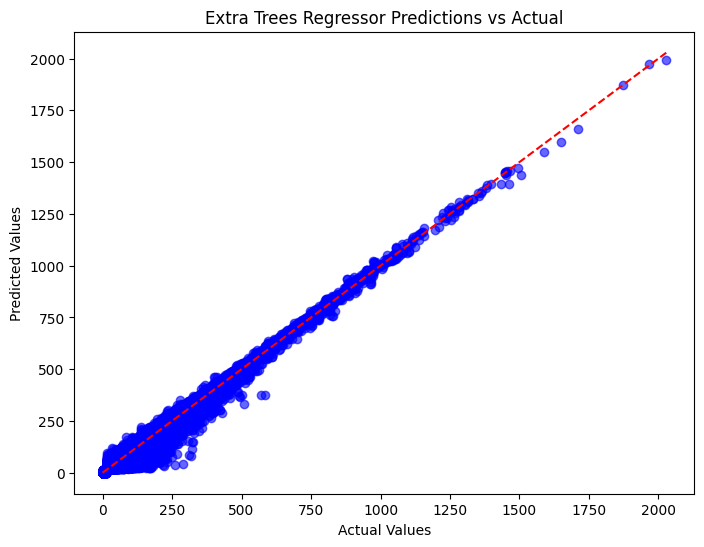

In [3]:
def visualize_results(y_test, y_pred, model_name):
    y_test = np.ravel(y_test)
    y_pred = np.ravel(y_pred)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title(f'{model_name} Predictions vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

visualize_results(y_test_res_filtered, y_pred_regression, 'Extra Trees Regressor')